<a href="https://colab.research.google.com/github/InduwaraGayashan001/OpenCV/blob/main/Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

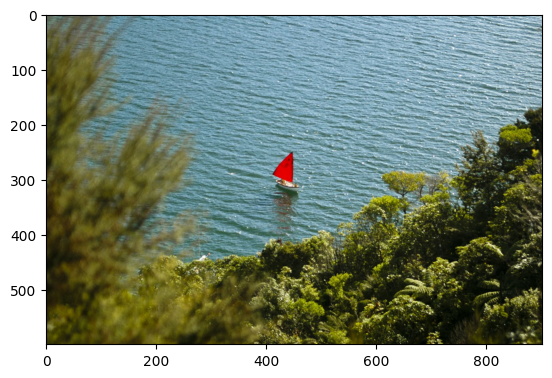

In [ ]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg")
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_NZ_rgb)

# Blurring

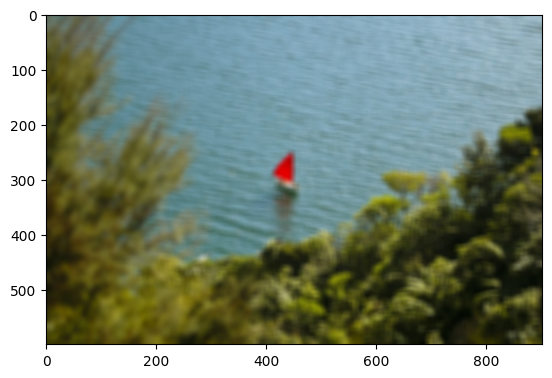

In [ ]:
blur_img = cv2.blur(img_NZ_rgb, ( 13, 13))

plt.imshow(blur_img)

# Canny Edge Detection

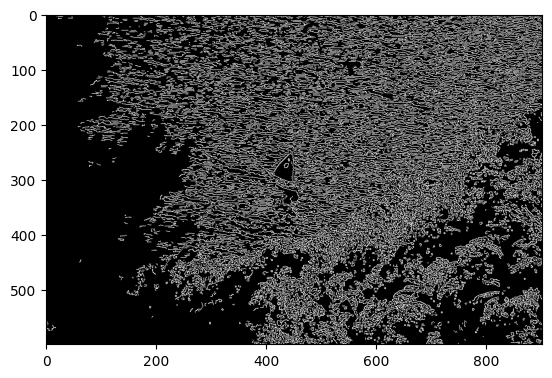

In [ ]:
canny_edges = cv2.Canny(img_NZ_rgb, 120, 175)

plt.imshow(canny_edges, cmap="gray")

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
from IPython.display import display

# Read image (make sure img_NZ_rgb is defined and read beforehand)
# Example:
# img = cv2.imread('building-windows.jpg')
# img_NZ_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def show_canny(min_val, max_val):
    # Ensure max_val > min_val
    if min_val >= max_val:
        print("max_val must be greater than min_val")
        return

    edges = cv2.Canny(img_NZ_rgb, min_val, max_val)

    plt.figure(figsize=(8, 6))
    plt.imshow(edges, cmap='gray')
    plt.title(f'Canny Edges: min={min_val}, max={max_val}')
    plt.axis('off')
    plt.show()

# Create sliders and display interactively
interact(show_canny,
         min_val=IntSlider(min=0, max=300, step=1, value=120, description='Min Threshold'),
         max_val=IntSlider(min=1, max=300, step=1, value=175, description='Max Threshold'))


interactive(children=(IntSlider(value=120, description='Min Threshold', max=300), IntSlider(value=175, descrip…

<function __main__.show_canny(min_val, max_val)>

# Feature Detection

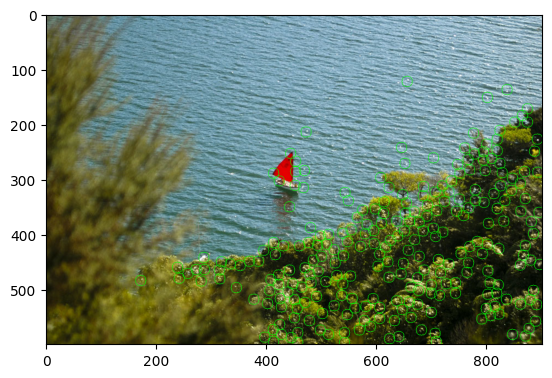

In [ ]:
result = img_NZ_rgb
feature_params = dict(maxCorners=500, qualityLevel=0.2, minDistance=15, blockSize=9)
frame_gray = cv2.cvtColor(img_NZ_rgb, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(frame_gray, **feature_params)
if corners is not None:
  for x, y in np.float32(corners).reshape(-1, 2):
    cv2.circle(result, (int(x), int(y)), 10, (0, 255, 0), 1)

plt.imshow(result)